In [ ]:
# import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df_combined = pd.read_csv(r'D:\\Downloads\\data_drowsiness\\merged\\combined_feature_label.csv')

# we have to rearrange the columns
column = df_combined.columns.tolist()
column = column[-1:] + column[4:5] + column[:4]
df_combined = df_combined[column]
df_combined

FileNotFoundError: ignored

In [ ]:
# read the dataset 
df = pd.read_csv('/content/normalized_data.csv',sep=',')
df.head()

,Y,MOE,Participant,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,1.0,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,1.0,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,1.0,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,1.0,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,1.0,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921


In [ ]:
df

,Y,MOE,Participant,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,1.0,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,1.0,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,1.0,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,1.0,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,1.0,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...,...
17275,5.0,3.011821,60.0,0.348480,1.049561,0.490477,0.219129,1.045407,0.011833,0.117043
17276,5.0,4.016572,60.0,0.262352,1.053755,0.395392,-3.791320,1.211484,-2.815814,4.557594
17277,5.0,3.212684,60.0,0.319431,1.026230,0.490811,-1.133518,0.121610,0.021755,1.004766
17278,5.0,4.230846,60.0,0.256146,1.083715,0.378786,-4.080274,2.397807,-3.309649,5.504590


In [ ]:
# let's check what all unique value do we have in the "Participant" column
df['Participant'].unique()

array([ 1.,  2.,  3.,  5., 10., 16., 18., 19., 21., 22., 27., 28., 34.,
       37., 43., 44., 48., 50., 51., 52., 53., 56., 57., 59., 60.])

In [ ]:
# let's check what all unique value do we have in the "Y" column
df['Y'].unique()

array([ 0., 10.,  5.])

In [ ]:
# let's drop the Participant column as we do not need this
df.drop(["Participant"], axis=1, inplace = True)

In [ ]:
# We will drop all the rows where Y == 5 because we are not considering the states with "low vigilant state"
df.drop(df[df.Y == 5].index, inplace=True)

In [ ]:
df

,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...
17035,10.0,4.791645,0.213104,1.021117,0.367879,-6.084482,-0.080850,-3.634001,7.983071
17036,10.0,4.072009,0.244625,0.996117,0.445070,-4.616718,-1.070763,-1.338495,4.802602
17037,10.0,3.644583,0.286575,1.044448,0.425488,-2.663385,0.842954,-1.920805,2.913568
17038,10.0,3.840868,0.265593,1.020106,0.414632,-3.640416,-0.120886,-2.243641,3.781062


In [ ]:
# Set 0.0 of y to int(0) which is set it to awake class
# Set 10.0 of y to int(1) which is set it to drowsy class
df.loc[df.Y == 0.0, "Y"] = int(0)
df.loc[df.Y == 10.0, "Y"] = int(1)

In [ ]:
# let's print the dataset
df

,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...
17035,1.0,4.791645,0.213104,1.021117,0.367879,-6.084482,-0.080850,-3.634001,7.983071
17036,1.0,4.072009,0.244625,0.996117,0.445070,-4.616718,-1.070763,-1.338495,4.802602
17037,1.0,3.644583,0.286575,1.044448,0.425488,-2.663385,0.842954,-1.920805,2.913568
17038,1.0,3.840868,0.265593,1.020106,0.414632,-3.640416,-0.120886,-2.243641,3.781062


In [ ]:
# X will have all the columns apart from the Y
X = df.drop('Y',axis=1).values
y = df['Y'].values

In [ ]:
# let's split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
# import KNeighbours
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# let's start with K=1
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Now we will fit the model.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# evaluation and prediction
pred = knn.predict(X_test)

In [ ]:
# let's evaluate our KNN model
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[976 249]
 [194 933]]


In [ ]:
# now let's choose a value for K
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

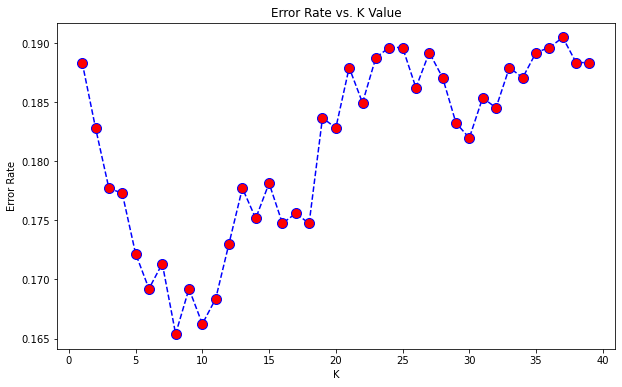

In [ ]:
# plot the Error rate vs K Value graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
 # NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[997 228]
 [177 950]]


              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1225
         1.0       0.81      0.84      0.82      1127

    accuracy                           0.83      2352
   macro avg       0.83      0.83      0.83      2352
weighted avg       0.83      0.83      0.83      2352



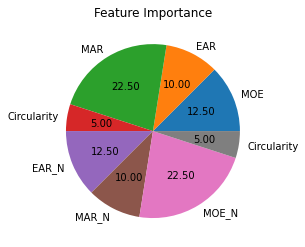

In [ ]:
sizes = [25, 20, 45, 10, 25, 20, 45, 10]
labels = ["MOE", "EAR", "MAR", "Circularity", "EAR_N", "MAR_N", "MOE_N", "Circularity"]
plt.pie(sizes, labels = labels, autopct = "%.2f")
plt.title("Feature Importance")
plt.show()

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(knn , open(filename, 'wb'))

In [ ]:
#@title Default title text
class Standardization:
    
    def __init__(self, df_combined):
        self.df_combined = df_combined

    #Functions for getting mean and std of each feature
    def calculate_Standardization(self):
        def mean_EAR(respondent):
            return df_means.loc[respondent]["EAR"]

        def mean_MAR(respondent):
            return df_means.loc[respondent]["MAR"]

        def mean_Circularity(respondent):
            return df_means.loc[respondent]["Circularity"]

        def mean_MOE(respondent):
            return df_means.loc[respondent]["MOE"]

        def std_EAR(respondent):
            return df_std.loc[respondent]["EAR"]

        def std_MAR(respondent):
            return df_std.loc[respondent]["MAR"]

        def std_Circularity(respondent):
            return df_std.loc[respondent]["Circularity"]

        def std_MOE(respondent):
            return df_std.loc[respondent]["MOE"]
        
       #Separating the rows which are "Alert" only
        df_state = self.df_combined[self.df_combined["Y"] == 0] 
        
        #Creating separate dataframes for each participants "Alert" state
        df_state_1 = df_state.iloc[0::240, :]
        df_state_2 = df_state.iloc[1::240, :]
        df_state_3 = df_state.iloc[2::240, :]
        
        #combining all "Alert" state into one dataframe
        state_first3 = [df_state_1,df_state_2,df_state_3]
        df_state_first3 = pd.concat(state_first3)
        df_state_first3 = df_state_first3.sort_index()
        
        # calculating per participant the mean and std for each feature
        pd.options.mode.chained_assignment = None
        df_means = df_state_first3.groupby("Participant")[["EAR", "MAR", "Circularity", "MOE"]].mean()
        df_std = df_state_first3.groupby("Participant")[["EAR", "MAR", "Circularity", "MOE"]].std()
        
        #Adding participant wise mean and std for each feature to each row in the original dataframe
        self.df_combined["EAR_mean"] = self.df_combined["Participant"].apply(mean_EAR)
        self.df_combined["MAR_mean"] = self.df_combined["Participant"].apply(mean_MAR)
        self.df_combined["Circularity_mean"] = self.df_combined["Participant"].apply(mean_Circularity)
        self.df_combined["MOE_mean"] = self.df_combined["Participant"].apply(mean_MOE)

        self.df_combined["EAR_std"] = self.df_combined["Participant"].apply(std_EAR)
        self.df_combined["MAR_std"] = self.df_combined["Participant"].apply(std_MAR)
        self.df_combined["Circularity_std"] = self.df_combined["Participant"].apply(std_Circularity)
        self.df_combined["MOE_std"] = self.df_combined["Participant"].apply(std_MOE)
        self.df_combined.head()
        print(self.df_combined.shape)
        
        #Normalizing the values
        self.df_combined["EAR_N"] = (self.df_combined["EAR"] - self.df_combined["EAR_mean"]) / self.df_combined["EAR_std"]
        self.df_combined["MAR_N"] = (self.df_combined["MAR"] - self.df_combined["MAR_mean"]) / self.df_combined["MAR_std"]
        self.df_combined["Circularity_N"] = (self.df_combined["Circularity"] - self.df_combined["Circularity_mean"]) / self.df_combined["Circularity_std"]
        self.df_combined["MOE_N"] = (self.df_combined["MOE"] - self.df_combined["MOE_mean"]) / self.df_combined["MOE_std"]
        return self.df_combined

In [ ]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))